<a href="https://colab.research.google.com/github/jitbnerejee4/jit/blob/fastai/Digit_accurate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *
from fastai.vision import *
from fastai import *
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [0]:
path = Path('/content')
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/content')

In [0]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [0]:
!kaggle competitions download -c digit-recognizer 

 82% 5.00M/6.09M [00:00<00:00, 30.3MB/s]
100% 6.09M/6.09M [00:00<00:00, 29.8MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 76.0MB/s]
 55% 5.00M/9.16M [00:00<00:00, 19.6MB/s]
100% 9.16M/9.16M [00:00<00:00, 30.4MB/s]


In [0]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/sample_submission.csv'),
 PosixPath('/content/train.csv.zip'),
 PosixPath('/content/test.csv.zip'),
 PosixPath('/content/sample_data')]

In [0]:
train_csv = pd.read_csv('/content/train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [0]:
z_train = Counter(train_csv['label'])
z_train

Counter({0: 4132,
         1: 4684,
         2: 4177,
         3: 4351,
         4: 4072,
         5: 3795,
         6: 4137,
         7: 4401,
         8: 4063,
         9: 4188})

In [0]:
x_train = (train_csv.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train_csv.iloc[:,0].values.astype('int32')

In [0]:
x_train

array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.]], dtype=float32)

In [0]:
y_train, y_train.min(), y_train.max()

(array([1, 0, 1, 4, ..., 1, 7, 6, 9], dtype=int32), 0, 9)

In [0]:
rng = np.random.RandomState()
valid = train_csv.sample(frac=0.2, random_state=rng)

In [0]:
valid

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40370,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1372,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34645,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19486,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1006,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39600,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24632,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6068,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5190,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x_valid = (valid.iloc[:,1:].values).astype('float32')
y_valid = (valid.iloc[:,0].values).astype('int32')

In [0]:
y_train = np.int_(y_train)
y_valid = np.int_(y_valid)

In [0]:
x_valid

array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.]], dtype=float32)

In [0]:
y_valid, y_valid.max(), y_valid.min()

(array([3, 5, 5, 6, ..., 0, 3, 7, 1]), 9, 0)

In [0]:
#x_train = x_train/255.0
#x_valid = x_valid/255.0

In [0]:
x_train[0]

array([0., 0., 0., 0., ..., 0., 0., 0., 0.], dtype=float32)

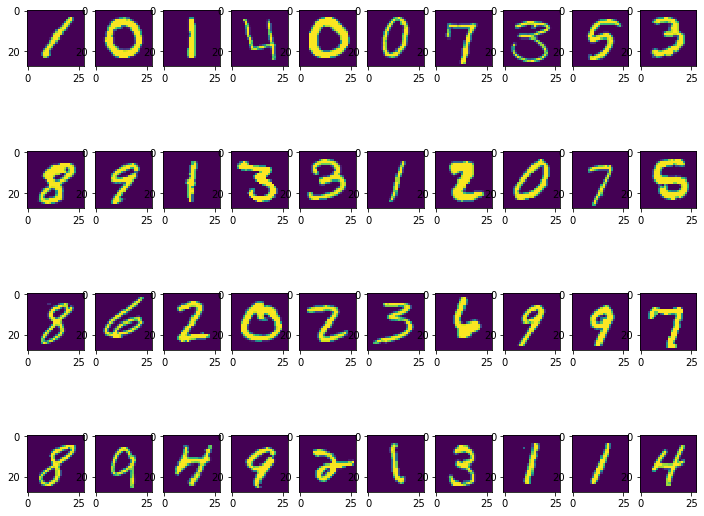

In [0]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [0]:
x_valid.shape, x_train.shape,y_train.shape, y_valid.shape

((8400, 784), (42000, 784), (42000,), (8400,))

In [0]:
y_train

array([1, 0, 1, 4, ..., 1, 7, 6, 9])

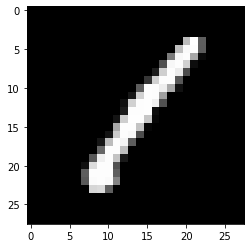

In [0]:
plt.imshow(x_train[0].reshape((28,28)), cmap="gray")

In [0]:
x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train.shape, x_valid.shape, y_train.min(), y_train.max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


(torch.Size([42000, 784]), torch.Size([8400, 784]), tensor(0), tensor(9))

In [0]:
test_csv = pd.read_csv('/content/test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [0]:
test= torch.tensor(test_csv.values)

In [0]:
test = test.type(torch.FloatTensor)

In [0]:
test.shape

torch.Size([28000, 784])

In [0]:
bs=64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [0]:
x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [0]:
lr=2e-2

In [0]:
loss_func = nn.CrossEntropyLoss()

In [0]:
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 50, bias=True)
        self.lin2 = nn.Linear(50, 10, bias=True)

    def forward(self, xb):
        x = self.lin1(xb)
        x = F.relu(x)
        return self.lin2(x)

In [0]:
model = Mnist_NN().cuda()

In [0]:
model(x).shape

torch.Size([64, 10])

In [0]:
[p.shape for p in model.parameters()]

[torch.Size([50, 784]),
 torch.Size([50]),
 torch.Size([10, 50]),
 torch.Size([10])]

In [0]:
def update(x,y,lr):
    opt = optim.Adam(model.parameters(), lr)
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [0]:
losses = [update(x,y,1e-3) for x,y in data.train_dl]

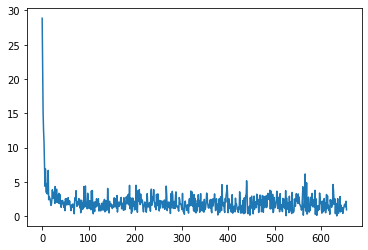

In [0]:
plt.plot(losses);

In [0]:
learn = Learner(data, Mnist_NN(), loss_func=loss_func, metrics=accuracy)

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


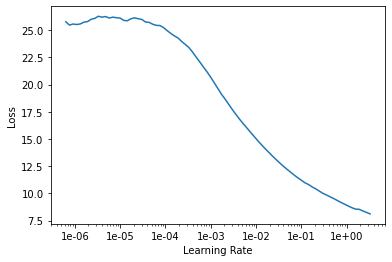

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,11.951036,10.331873,0.213810,00:03
1,2.743584,2.603670,0.586905,00:03
2,1.591439,1.553004,0.685238,00:03
3,1.291861,1.300161,0.710476,00:03
4,1.288585,1.266969,0.715952,00:03


In [0]:
learn.save('stage-1')

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


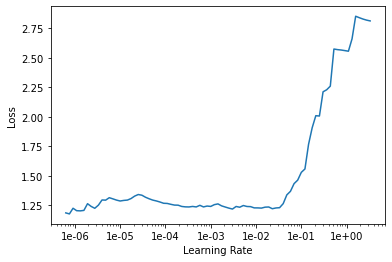

In [0]:
learn.recorder.plot()

In [0]:
learn.load('stage-1')

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f8e792d0d68>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f8e792d06a0>;

Test: None, model=Mnist_NN(
  (lin1): Linear(in_features=784, out_features=50, bias=True)
  (lin2): Linear(in_features=50, out_features=10, bias=True)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=CrossEntropyLoss(), metrics=[<function accuracy at 0x7f8e7b4c4400>], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_groups=[Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): Linear(in_features=50, out_features=10, bias=True)
)], add_time=True, silent=False)

In [0]:
learn.fit_one_cycle(5, 2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,1.072762,1.031897,0.755952,00:03
1,0.769358,0.708915,0.821071,00:03
2,0.557489,0.567589,0.853929,00:03
3,0.531179,0.517434,0.863095,00:03
4,0.495137,0.509730,0.865476,00:03


In [0]:
learn.save('stage-2')

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


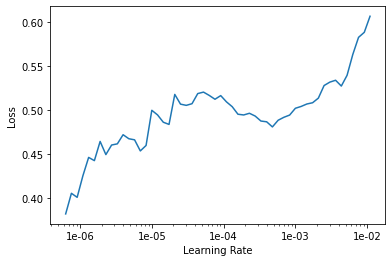

In [0]:
learn.recorder.plot()

In [0]:
learn.load('stage-2')

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f8e792d0d68>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f8e792d06a0>;

Test: None, model=Mnist_NN(
  (lin1): Linear(in_features=784, out_features=50, bias=True)
  (lin2): Linear(in_features=50, out_features=10, bias=True)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=CrossEntropyLoss(), metrics=[<function accuracy at 0x7f8e7b4c4400>], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_groups=[Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): Linear(in_features=50, out_features=10, bias=True)
)], add_time=True, silent=False)

In [0]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.418221,0.363307,0.895714,00:03
1,0.238629,0.172957,0.947262,00:03
2,0.178843,0.123561,0.962024,00:03
3,0.105528,0.080911,0.974881,00:03
4,0.080383,0.070824,0.978214,00:03


In [0]:
learn.save('stage-4')

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


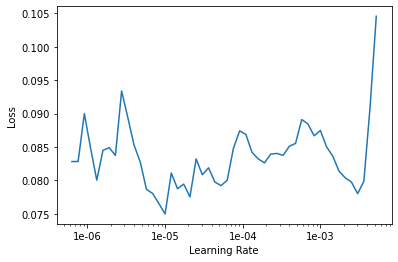

In [0]:
learn.recorder.plot()

In [0]:
learn.load('stage-4')

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f8e792d0d68>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f8e792d06a0>;

Test: None, model=Mnist_NN(
  (lin1): Linear(in_features=784, out_features=50, bias=True)
  (lin2): Linear(in_features=50, out_features=10, bias=True)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=CrossEntropyLoss(), metrics=[<function accuracy at 0x7f8e7b4c4400>], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_groups=[Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): Linear(in_features=50, out_features=10, bias=True)
)], add_time=True, silent=False)

In [0]:
learn.fit_one_cycle(5, 3e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.079783,0.070513,0.977857,00:03
1,0.077186,0.069636,0.978333,00:03
2,0.071306,0.068911,0.978452,00:03
3,0.074883,0.068610,0.978691,00:03
4,0.074121,0.068575,0.978691,00:03


In [0]:
learn.save('stage-5')

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


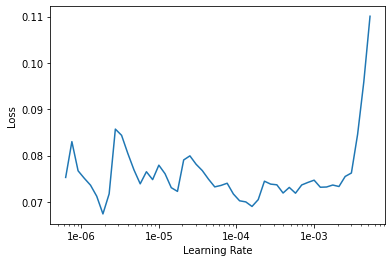

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(12, 2e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.074472,0.068533,0.978571,00:03
1,0.081868,0.068323,0.978571,00:03
2,0.078592,0.067946,0.978810,00:03
3,0.081002,0.067550,0.979048,00:03
4,0.078054,0.067083,0.979048,00:03
5,0.073048,0.066781,0.979048,00:03
6,0.067170,0.066468,0.979167,00:03
7,0.067621,0.066253,0.979405,00:03
8,0.070412,0.066098,0.979286,00:03
9,0.069886,0.066032,0.979286,00:03


In [0]:
learn.save('stage-6')

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


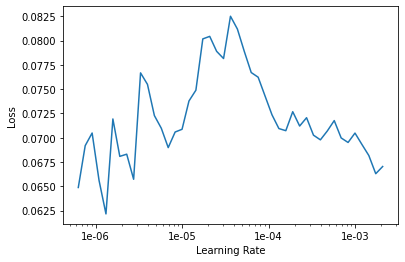

In [0]:
learn.recorder.plot()

In [0]:
learn.load('stage-6')

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f8e792d0d68>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f8e792d06a0>;

Test: None, model=Mnist_NN(
  (lin1): Linear(in_features=784, out_features=50, bias=True)
  (lin2): Linear(in_features=50, out_features=10, bias=True)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=CrossEntropyLoss(), metrics=[<function accuracy at 0x7f8e7b4c4400>], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_groups=[Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): Linear(in_features=50, out_features=10, bias=True)
)], add_time=True, silent=False)

In [0]:
learn.fit_one_cycle(20, 2e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.076309,0.065184,0.979643,00:03
1,0.076561,0.068276,0.979405,00:03
2,0.086630,0.069111,0.977976,00:03
3,0.088345,0.066378,0.979524,00:03
4,0.086116,0.071521,0.977024,00:03
5,0.078878,0.064930,0.977976,00:03
6,0.077487,0.059224,0.980476,00:03
7,0.068251,0.043281,0.986786,00:03
8,0.047663,0.035023,0.988214,00:03
9,0.049986,0.029764,0.990357,00:03


In [0]:
learn.save('stage-7')

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


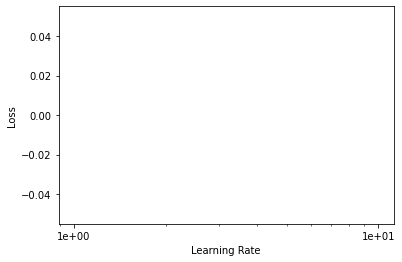

In [0]:
learn.recorder.plot()

In [0]:
learn.load('stage-7')

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f8e792d0d68>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f8e792d06a0>;

Test: None, model=Mnist_NN(
  (lin1): Linear(in_features=784, out_features=50, bias=True)
  (lin2): Linear(in_features=50, out_features=10, bias=True)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=CrossEntropyLoss(), metrics=[<function accuracy at 0x7f8e7b4c4400>], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_groups=[Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): Linear(in_features=50, out_features=10, bias=True)
)], add_time=True, silent=False)

In [0]:
learn.fit_one_cycle(10, 2e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.009620,0.007840,0.998333,00:03
1,0.025673,0.017648,0.994405,00:03
2,0.028153,0.016691,0.995476,00:03
3,0.027012,0.015090,0.994881,00:03
4,0.022950,0.015108,0.995000,00:03
5,0.012739,0.012559,0.995714,00:03
6,0.007768,0.005531,0.998810,00:03
7,0.004744,0.004062,0.999286,00:03
8,0.004039,0.003507,0.999286,00:03
9,0.003001,0.003392,0.999405,00:03


In [0]:
learn.save('stage-8')

In [0]:
learn.load('stage-8')

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f8e792d0d68>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f8e792d06a0>;

Test: None, model=Mnist_NN(
  (lin1): Linear(in_features=784, out_features=50, bias=True)
  (lin2): Linear(in_features=50, out_features=10, bias=True)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=CrossEntropyLoss(), metrics=[<function accuracy at 0x7f8e7b4c4400>], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_groups=[Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): Linear(in_features=50, out_features=10, bias=True)
)], add_time=True, silent=False)

In [0]:
learn.fit_one_cycle(5, 2e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.009127,0.008921,0.997143,00:03
1,0.021862,0.018356,0.993810,00:03
2,0.008998,0.008889,0.997738,00:03
3,0.006078,0.003514,0.999524,00:03
4,0.001914,0.002623,0.999762,00:03


In [0]:
learn.save('stage-9')

In [0]:
learn.load('stage-9')

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f8e792d0d68>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f8e792d06a0>;

Test: None, model=Mnist_NN(
  (lin1): Linear(in_features=784, out_features=50, bias=True)
  (lin2): Linear(in_features=50, out_features=10, bias=True)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=CrossEntropyLoss(), metrics=[<function accuracy at 0x7f8e7b4c4400>], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_groups=[Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): Linear(in_features=50, out_features=10, bias=True)
)], add_time=True, silent=False)

In [0]:
learn.fit_one_cycle(10, 2e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.002770,0.002515,0.999762,00:03
1,0.007569,0.008855,0.997500,00:03
2,0.017538,0.027165,0.992381,00:03
3,0.022207,0.014250,0.995357,00:03
4,0.012680,0.006509,0.998452,00:03
5,0.005920,0.004345,0.998690,00:03
6,0.005085,0.002496,0.999762,00:03
7,0.002328,0.001761,0.999762,00:03
8,0.001234,0.001515,0.999881,00:03
9,0.001003,0.001438,0.999881,00:03


In [0]:
learn.save('stage-10')

TESTING

In [0]:
# make example a torch tensor
result = []
for i in range(0, 28000):
  value = torch.Tensor(test[i])

  # then put it on the GPU, make it float and insert a fake batch dimension
  test_value = value.cuda()
  #test_value = test_value.float()
  test_value = test_value.unsqueeze(0)

  # pass it through the model
  prediction = model2(test_value)
  cpu_pred = prediction.cpu()
  # get the result out and reshape it
  _, predicted = torch.max(cpu_pred, 1)
  result.append(predicted.data.numpy().astype('int32'))

In [0]:
result[8502]

array([4], dtype=int32)

In [0]:
df = pd.DataFrame({"ImageId": list(range(1,len(result)+1)), "Label": result}).to_csv(index=False, header=True, columns = ['ImageId', 'Label'])

Exception: ignored

In [0]:
df.head()

AttributeError: ignored

In [0]:
df.to_csv(path/'submission.csv', index=False)

AttributeError: ignored

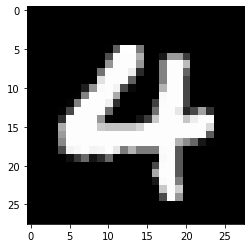

In [0]:
plt.imshow(test[8502].reshape((28,28)), cmap="gray")

In [0]:
path

PosixPath('/content')

In [0]:
torch.save(model.state_dict(), path/'mnist_model.pkl')

In [0]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/sample_submission.csv'),
 PosixPath('/content/models'),
 PosixPath('/content/mnist_model'),
 PosixPath('/content/train.csv.zip'),
 PosixPath('/content/test.csv.zip'),
 PosixPath('/content/sample_data')]

In [0]:
torch.save(model, path/'entire_model')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Mnist_NN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
torch.save(model, path/'export.pkl')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Mnist_NN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
model2 = torch.load(path/'export.pkl')

In [0]:
model2.eval()

Mnist_NN(
  (lin1): Linear(in_features=784, out_features=50, bias=True)
  (lin2): Linear(in_features=50, out_features=10, bias=True)
)

In [0]:
submission = pd.read_csv('sample_submission.csv')

In [0]:
submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0
